### Análisis Segmentación de Cliente aplicando modelos de Clustering

#### Objetivos del proyecto

En el presente cuaderno se analizarán los datos recopilados por un centro comercial sobre los hábitos de compra de sus clientes.

El objetivo a lograr es crear clusters de clientes, agrupándolos en diferentes grupos aquellos clientes que compartan una serie de patrones comunes. De esta forma, el centro comercial llegará a conocer más sobre el comportamiento de los clientes y mejorar las estrategias de marketing y publicidad aplicadas de cara al incremento de las ventas.

Para ello aplicaremos las técnicas del aprendizaje no supervisado, el cuál nos permite descubrir estructuras ocultas en los datos donde no sabemos la respuesta correcta de antemano. El objetivo de la agrupación es encontrar una agrupación natural de datos de modo que los elementos de un mismo grupo sean más similares entre sí que los de diferentes grupos.

Con el fin de lograr los objetivos establecidos, aplicaremos los algoritmos de Clustering K-Means y Métodos Jerárquicos Aglomerados y construiremos un modelo que nos ayude a conocer mejor el comportamiento de los clientes del centro comercial.

#### 1 Importación de librerías y paquetes

In [1]:
#### 1 Instalación Librerías
# Packages for data management
import numpy as np
import pandas as pd

# Packages for data visualization
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib import cm

# Packages for Clustering algorithms
## K-means model
from sklearn.cluster import KMeans
## Hierarquical models
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import AgglomerativeClustering
# Density models
from sklearn.cluster import DBSCAN
# Model Performance Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, silhouette_samples

# Other Packages
import warnings
warnings.filterwarnings("ignore")

#### 2 Procesamiento de datos

Antes de construir nuestro modelo, el primer paso que realizaremos será analizar los datos proporcionados por el centro comercial.  

In [2]:
#Importar el conjunto de datos
df_dataset = pd.read_csv('Mall_Customers.csv')

#Visualizar los resultados
df_dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Visualiar el tamaño del conjunto de datos
df_dataset.shape

(200, 5)

A diferencia de los modelos de aprendizaje supervisado, en los algoritmos de Clustering no hay variable independiente, pues no sabemos qué es lo que vamos a predecir (el objetivo de clustering es buscar patrones en los datos y crear una variable independiente en base a dichos patrones).

Por lo tanto, sólo calcularemos la variable independiente (X) teniendo en cuanta las columnas que nos darán información valioso para el análisis de patrones, como son en este caso las columnas "Annual Income (k$)" y "Spending Score (1-100)", que se corresponden con los índices 3 y 4 del dataframe creado en el apartado anterior.

In [4]:
# Cálculo variavle independiente (X)
X = df_dataset.iloc[:, [3, 4]].values

# Print de los resultados
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [5]:
df_X = df_dataset.drop(['CustomerID','Genre','Age'], axis=1)

In [6]:
type(X)

numpy.ndarray

En los modelos de clustering tampoco dividiremos los datos entre training (entrenamiento) y test (prueba), ya que esta acción en los algoritmos de Clustering no es necesaria porque esto implica tener un vector de variable dependiente.

Por último, graficaremos los datos de la variable independiente praa analizar la distribución de cada una de las observaciones recogidas en el conjunto de datos.

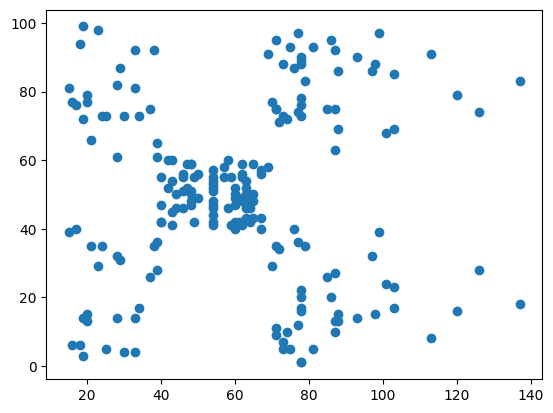

In [7]:
# Visualización previa de los datos
plt.scatter(X[:, 0], X[:, 1]);

A simple vista podemos observar que los datos se clasifican en 5 agrupaciones según el anterior gráfico. Sin embargo, pondremos a prueba los algoritmos de Clustering para validar si realmente podemos agrupar los datos en 5 o en otra cigra de grupos de clientes. 

#### 3 Aplicación Algoritmo K-Means

##### 3.1. Introducción

El algoritmo **k-means** pertenece a la categoría de agrupación basada en prototipos. La agrupación basada en prototipos significa que cada grupo está representado por un prototipo, que suele ser el centroide (promedio) de puntos similares con características continuas, o el medoide (el punto más representativo o que minimiza la distancia a todos los demás puntos que pertenecen a un grupo particular) en el caso de características categóricas

Por lo tanto, nuestro objetivo es agrupar los ejemplos según sus similitudes de características, lo que se puede lograr utilizando el algoritmo k-means, como se resume en los siguientes cuatro pasos:

- Paso 1: Seleccionar de forma aleatoria K centroides de la muestra de datos como los centroides iniciales de los clusters.
- Paso 2: Asignar cada ejemplo o punto de datos al centroide más cercano.
- Paso 3: Mover los centroides al centro de los ejemplos que le fueron asignados.
- Paso 4: Repita los pasos 2 y 3 hasta que las asignaciones de clúster no cambien o se alcance una tolerancia definida por el usuario o un número máximo de iteraciones.

Para medir la similitud entre dos objetos el algoritmo k-means utiliza la distancia euclidiana cuadrada entre dos puntos, x e y, en el espacio m-dimensional.

En el algoritmo k-means tenemos que especificar el número de clústers, K, a priori. Para identidicar el número óptimo de clústers a incluir en nuestro modelo podemos utilizar diversas técnicas, como el **método de Elbow** o **las graficas de siluetas** (silhouette plots). 

En los siguientes apartados aboradaremos estos conceptos con más detalle. 

##### 3.2. Elección del número óptimo de clústers

Para seleccionar el número correcto de clústeres en el algoritmo k-means utilizaremos la métrica denominada "suma de cuadrados dentro del grupo", la cual se denomina en inglés "within-cluster sum-of squares" (WCSS). La métrica WCSS proporciona la media de las sumas de las distancias de las observaciones desde sus centros de clúster.

Con base en el WCSS dentro del grupo, podemos usar una herramienta gráfica del método de Elbow, conocida popularmente como el método del codo, para estimar el número óptimo de grupos, k, para una tarea determinada.
Podemos decir que si k aumenta, la distorsión disminuirá. Esto se debe a que los ejemplos estarán más cerca de los centroides a los que están asignados. La idea detrás del método del codo es identificar el valor de k donde la distorsión comienza a aumentar más rápidamente, lo que quedará más claro si trazamos la distorsión para diferentes valores de k.

Distorsion: 11702.17


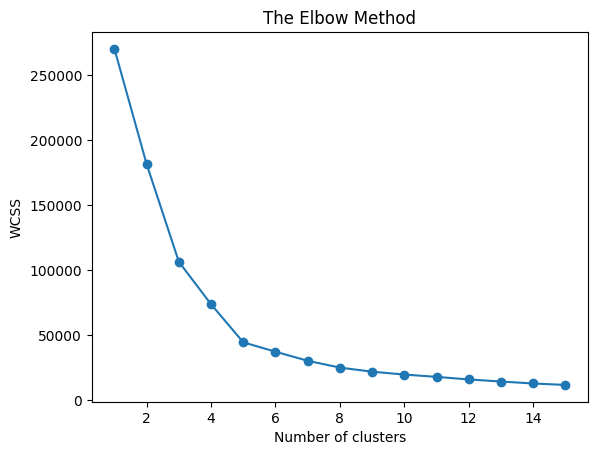

In [8]:
# Aplicación del método de Elbow para encontrar el nº óptimo de clusters

#Creación de una lista que se poblará con los valores de CWSS sucesivos para cada número de clusters
wcss = []

#incluir en el bucle valores hasta limite de 11 para que incluya 10 valores
for i in range(1, 16):
    #objeto Kmeans para cada uno de los clusters
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) #random_state=random underscore state
    #entrenar el algoritmo K Means con el metodo FIT
    kmeans.fit(X)
    #usamos la funcion append para ir añadiendo valores a la lista wcss
    #llamamos al atributo inertia_ de la clase kmeans que muestra el valor de WCSS
    #objetos y clases tienen atributos muestran valores 
    wcss.append(kmeans.inertia_)

#Check the average value for distorsion (WCSS)
print('Distorsion: %.2f' % kmeans.inertia_)

#visualicar los resultados del bucle for en un grafico   
plt.plot(range(1, 16), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Al visualizar la información en el gráfico, identificamos que a medida que incrementa el número de clusters se reduce la el valor de la métrica WCSS. Además, se observa que a partir de 5 clusters el valor de la mética WCSS dismuye muy lentamente, es decir, la curva empieza a ser casi plana. Por lo tanto, el número óptimo de clusters a incluir en nuestro modelo serán 5 clusters.

##### 3.3. Construcción y entrenamiento del modelo de K-Means

In [9]:
#Arrancamos la clase KMeans incluyendo los parámetros necesarios
kmeans = KMeans(n_clusters = 5, init = 'k-means++',  n_init = 10, max_iter = 300, tol=1e-04, random_state = 42)

# n_init= 10 para ejecutar los algoritmos de agrupamiento k-means 10 veces de forma independiente
# max_iter = 300 para especificar el número máximo de iteraciones para cada ejecución



Nota 1: El algoritmo k-means se detiene temprano si converge antes de que se alcance el número máximo de iteraciones.

Nota 2 : Una forma de abordar los problemas de convergencia es elegir valores mayores para _tol_, que es un parámetro que controla la tolerancia con respecto a los cambios en el SSE dentro del clúster para declarar la convergencia.

Para entrenar el modelo y obtener las etiquetas de los datos clasificados (el identificador del grupo al que asignamos cada punto) utilizaremos el método fit_predict.

In [10]:
#Entrenamos el conjunto de datos utilizando método FIT_PREDICT (entrena los datos y devuelve los puntos claisifcados en cada cluster)
#Creamos la variable independiente resultado de entrenar el algoritmo KMeans
y_km = kmeans.fit_predict(X)

#print de los resultados de la variable y_kmeans
print('Etiquetas de clase: %s\n' % y_km)

Etiquetas de clase: [2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]



In [11]:
#Recolectar la posicion de los centroides de cada cluster
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

##### 3.4. Visualización de los datos clasificados

Una vez que hemos entrenado el modelo y obtenido la clasificación de etiquetas de datos, visualizaremos los resultados finales.

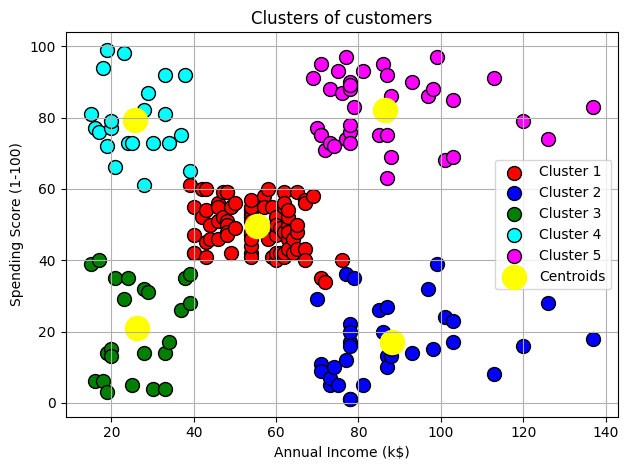

In [12]:
#Visualizamos los resultados de la generación de clusters en un gráfico

# Gráfico para cada uno de los clusters
#Grafico para el Cluster 1 (y_means = 0)
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s = 100, c = 'red', edgecolor = 'black', label = 'Cluster 1')
#Grafico para el Cluster 2 (y_means = 1)
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s = 100, c = 'blue', edgecolor = 'black', label = 'Cluster 2')
#Grafico para el Cluster 3 (y_means = 2)
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s = 100, c = 'green', edgecolor = 'black', label = 'Cluster 3')
#Grafico para el Cluster 4 (y_means = 3)
plt.scatter(X[y_km == 3, 0], X[y_km == 3, 1], s = 100, c = 'cyan', edgecolor = 'black', label = 'Cluster 4')
#Grafico para el Cluster 5 (y_means = 4)
plt.scatter(X[y_km == 4, 0], X[y_km == 4, 1], s = 100, c = 'magenta', edgecolor = 'black', label = 'Cluster 5')

#Nota: X=0 es la columna "Annual Income (k$)" y X=1 es la columna "Spending Score (1-100)"

#Tocar el centro de cada uno de estos puntos
#Usamos el atributo cluster_centers del objeto KMeans
#Matriz donde las lineas corresponden con los centroides y las columnas de coordenadas de X
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

#Configuracion del grafico
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

##### 3.3. Cuantificar la calidad de la agrupación mediante gráficos de silueta

Una métrica intrínseca para evaluar la calidad de la agrupación es el __análisis de silueta__, que también se puede aplicar al análisis de Clustering como herramienta gráfica para trazar una medida de cuán estrechamente están los ejemplos en los grupos.

Para calcular el coeficiente de silueta de un solo ejemplo en nuestro conjunto de datos, podemos aplicar tres pasos:
- Calcular la cohesión del cluster como la distancia promedio entre un ejemplo, x, y todos los demás puntos en el mismo cluster.
- calcular la separación del grupo desde el siguiente grupo más cercano como la distancia promedio entre el ejemplo, x y todos los ejemplos en el grupo más cercano.
Calcule la silueta como la diferencia entre la cohesión y la separación del grupo dividida por la mayor de las dos.

El coeficiente de silueta está limitado en el rango de -1 a 1. En el caso de obtener un resultado de 0 en el coeficiente de silueta, sería un idicador de que la agrupación de los datos no se ha realizado correctamente, ya que  se obtiene que la separación y cohesión del grupo son iguales. Por lo tanto, lo ideal es acercarse a un coeficiente de silueta 1.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


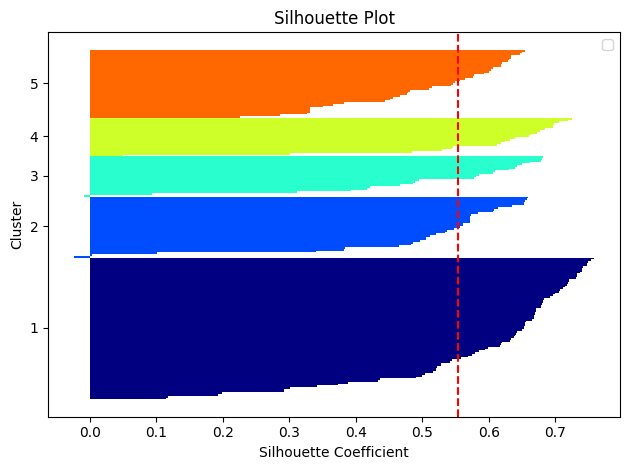

In [13]:
##Apply Silhouette Analysis to quantify the quality of clustering

#Define Silhouette Coefficient metrics
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_valls = silhouette_samples(X, y_km, metric = 'euclidean')

#Build the Silhouette plot
y_aux_lower, y_aux_upper = 0,0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_valls = silhouette_valls[ y_km == c]
    c_silhouette_valls.sort()
    y_aux_upper += len(c_silhouette_valls)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_aux_lower,y_aux_upper),
             c_silhouette_valls,
             height = 1.0,
             edgecolor = 'none',
             color = color
             )
    yticks.append((y_aux_lower + y_aux_upper) / 2.)
    y_aux_lower += len(c_silhouette_valls)

silhouette_avg = np.mean(silhouette_valls)
plt.axvline(silhouette_avg,
             color = "red",
             linestyle = "--"
             )
plt.yticks(yticks, cluster_labels + 1)
#configuracion dle grafico
plt.title('Silhouette Plot')
plt.ylabel('Cluster')
plt.xlabel('Silhouette Coefficient')
plt.legend()
plt.tight_layout()
plt.show()


A través de una inspección visual del gráfico de silueta, podemos examinar rápidamente los tamaños de los diferentes grupos e identificar grupos que contienen valores atípicos. La línea de puntos incluida en el gráfico nos muestra información sobre el coeficiente de silueta promedio a la gráfica.

En nuestro caso, los coeficientes de silueta para cada cluster ni siquiera se acercan a 0, lo que es un indicador de una buena agrupación. Además, las siluetas ahora tienen longitudes y anchos visiblemente similares, lo que es evidencia de una agrupación relativamente buena.

#### 4 Aplicación Métodos Jerárquicos Aglomerados

##### 4.1 Introducción

Echaremos un vistazo a un enfoque alternativo al agrupamiento jerárquico basado en prototipos, cuyo objetivo es agrupar clústeres para formar uno nuevo o bien separar alguno ya existente para dar origen a otros dos.

Los métodos jerárquicos permiten trazar dendogramas (visualizaciones de una agrupación jerárquica binaria), lo que puede ayudar con la interpretación de los resultados mediante la creación de taxonomías significativas. Otra ventaja es que no es necesario especificar el número de grupos por adelantado.

Los dos enfoques principales para la agrupación herárquica son la agrupación jerárquica aglomerativa y divisiva.
- Los métodos aglomerativos, también conocidos como ascendentes, comienzan el análisis con tantos grupos como individuos haya. A partir de estas unidades se van formando grupos de forma ascendente, hasta que al final del proceso todos los casos tratados están englobados en un mismo conglomerado.
- Los métodos disociativos, también conocidos como descendentes, constituyen el proceso inverso. Comienzan con un conglomerado que engloba a todos los casos tratados y, a partir de este grupo inicial, a través de sucesivas divisiones se van formando grupos cada vez más pequeños. Al final del proceso se tienen tantas agrupaciones como casos han sido tratados.

En este análisis nos centraremos en los métodos aglomerativos, ya que intentamos obtener el número óptimo de clústers.

¿Cómo funcionan los métodos aglomerativos?
- Paso 1: Hacer de cada punto de daos un solo grupo de puntos (N clústeres individuales).
- Paso 2: Tomar los dos puntos de datos más cercanos y convertirlos en un grupo para combinarlos en un único grupo, reduciendo de esta forma los grupos de clústeres (esto forma N-1 clústeres).
- Paso 3: Selección de los dos clústeres más cercanos y crea uno solo (esto forma N-2 clústeres).
- Paso 4: Repetición de los anteriores pasos hasta:
    -  Se forma un solo grupo.
    -  Se alcanca el número de grupos prefijado.
    -  Se detecta que hay razones estadísticas para no continuar agrupando clusters, ya que los más similares no son lo suficientemente homogéneos como para determinar una misma agrupación.

Para medir las distancias de los clústeres más ceranos se utilizan las "distancias euclídeas", la "proximidad de puntos" o la "proximidad de clusteres".

##### 4.2 Agrupar clusters de abajo hacia arriba

Los dos algoritmos estándar para la agrupación jerárquica aglomerativa son el enlace único y el enlace completo.

- __Single Linkage__: En el enlace simple calculamos la distancia entre los miembros más similares para cada par de conglomerados y fusionamos los dos conglomerados para los cuales la distancia entre los miembros más similares es la más pequeña.
- __Complete Linkage__: En el enfoque de vinculación completa es similar al de vinculación única pero, en lugar de comparar los miembros más similares en cada par de grupos, comparamos los miembros más diferentes para realizar la fusión.

Otras alternativas de enlace entre los puntos de datos son los siguientes:
- __Average Linkage__: Fusionamos los pares de grupos en función de las distancias promedio mínimas entre todos los miembros del grupo en los dos grupos.
- __Metodo de Ward__: El objetivo de este método es encontrar en cada etapa aquellos dos clústeres cuya unión proporcione el menor incremento en la suma total de errores (suma de cuadrados de las diferencias).

En nuestro caso centraremos el enfoque en el complete linkage, el cual se puede resumir en los siguientes puntos:
- Paso 1: Calcular la matriz de distancias de todos los ejemplos.
- Paso 1: Representar cada punto de datos como un grupo singleton.
- Paso 3: Fusionar los dos grupos más cercanos según la distancia entre los miembros más diferentes (distantes).
- Paso 4: Actualizar la matriz de similitud.
- Paso 5: Repitir los pasos 2 a 4 hasta que quede un solo grupo.

##### 4.3 Realizar agrupamiento jerárquico en una matriz de distancias

Calcularemos la matriz de distancia como entrada para el algoritmo de agrupamiento jerárquico. Para ello, calcularemos la distancia de Eucliden entre cada par de ejemplos de entrada en nuestro conjunto de datos en función de las diferentes variables que componen el conjunto X.

Posteriormente, aplicaremos la aglomeración de enlaces completa a nuestros clústeres utilizando la función de enlace, que devuelve la llamada matriz de enlaces.

In [14]:
# Calculo de la matriz de distancias entre los diferentes puntos del dataset
row_dist = pd.DataFrame(squareform(
                           pdist(X, metric = 'euclidean'))
                        )

row_dist

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.000000,42.000000,33.015148,38.013156,2.236068,37.054015,33.136083,55.081757,36.221541,33.241540,...,89.442719,92.973114,102.786186,110.941426,107.489534,112.361025,111.543713,116.387285,123.794184,129.691943
1,42.000000,0.000000,75.006666,4.123106,41.048752,5.385165,75.059976,13.341664,78.102497,9.848858,...,105.394497,88.814413,122.200655,98.508883,123.490890,105.019046,123.004065,111.220502,137.306227,122.016392
2,33.015148,75.006666,0.000000,71.000000,34.014703,70.007142,2.000000,88.022724,4.242641,66.068147,...,88.645361,107.415083,97.020616,128.972865,104.479663,127.062977,112.178429,129.321305,121.593585,143.422453
3,38.013156,4.123106,71.000000,0.000000,37.013511,1.414214,71.028163,17.117243,74.060786,5.830952,...,102.396289,87.367042,119.037809,98.005102,120.569482,104.019229,120.420098,110.040901,134.617978,121.148669
4,2.236068,41.048752,34.014703,37.013511,0.000000,36.000000,34.014703,54.009258,37.054015,32.062439,...,87.664132,90.757920,101.192885,108.706026,105.759160,110.136279,109.658561,114.179683,122.000000,127.471565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,112.361025,105.019046,127.062977,104.019229,110.136279,103.043680,125.431256,103.097042,126.400158,101.242284,...,58.523500,19.723083,71.344236,13.892444,63.000000,0.000000,51.351728,7.810250,63.324561,17.464249
196,111.543713,123.004065,112.178429,120.420098,109.658561,119.100798,110.217966,126.570139,109.881755,115.693561,...,23.537205,47.010637,23.853721,64.327288,13.416408,51.351728,0.000000,46.000000,14.866069,56.089215
197,116.387285,111.220502,129.321305,110.040901,114.179683,109.018347,127.624449,109.836242,128.413395,107.018690,...,55.946403,23.537205,67.268120,21.400935,58.309519,7.810250,46.000000,0.000000,57.070132,14.212670
198,123.794184,137.306227,121.593585,134.617978,122.000000,133.281657,119.603512,141.198442,118.949569,129.769026,...,34.365681,61.294372,26.000000,76.843998,17.117243,63.324561,14.866069,57.070132,0.000000,65.000000


Procedemos a calcular la __matriz de enlace_, la cuál se utilizará como input para la construcción de dendogramas. La matriz de enlace consta de varias filas donde cada fila representa una fusión. La primera y segunda columnas indican los miembros más diferentes en cada grupo y la tercera columna informa la distancia entre esos miembros.

In [15]:
# Cálculo de la matriz de enlace (linkagae matrix)

row_clusters = linkage(X, metric='euclidean', method = 'complete')

linkage_matrix = pd.DataFrame(row_clusters,
                              columns = ['row label 1', 'row label 2', 'distance', 'nº of items in cluster'],
                              index = ['cluster %d' % (i + 1) for i in range (row_clusters.shape[0]) ]
                           
                        )

linkage_matrix

,row label 1,row label 2,distance,nº of items in cluster
cluster 1,65.0,68.0,0.000000,2.0
cluster 2,48.0,49.0,0.000000,2.0
cluster 3,129.0,131.0,0.000000,2.0
cluster 4,156.0,158.0,0.000000,2.0
cluster 5,21.0,23.0,1.000000,2.0
...,...,...,...,...
cluster 195,369.0,391.0,68.468971,39.0
cluster 196,389.0,392.0,74.330344,108.0
cluster 197,388.0,395.0,96.026038,129.0
cluster 198,393.0,394.0,101.414989,71.0


##### 4.4 Uso de gráficos de dendogramas para el cálculo óptimo de clústeres.

El dendograma almacena la memoria del algoritmo de agrupación jerárquica, ya que los dendogramas mantienen una memoria de cómo se pasan por los diferentes puntos del dataset.

Por lo tanto, el dendograma es la memoria de los modelos jerárquicos. Cuanto más lejos estén dos puntos, más disímiles/diferentes serán dichos puntos y esto se mide por la altura de las líneas que tan algo lo estamos colocando. En los dendogramas la disimilitud entr dos observaciones se representa a través de la __distancia euclídea__.

Los dendogramas se construyen de abajo hacia arriba y el subsuelo del dendograma contiene la memoria del algortimo de agrupación jerárquico, es decir, de cómo se formaron los grupos durante el algoritmo de agrupamiento jerárquico. Por lo tanto, con solo la gráfica se puede comprender en qué orden se ha ido formando los clústeres.

Otro uso común de los dendogramas es la obtención del máximo valor de los algoritmos de clasificación jerárquica. Para ello, evaluaremos los niveles horizontales y se establecerán umbrales o distancais, las cuales se denomina __umbrales de disimilitud__.

Por lo tanto, estableceremos el umbral de disimilutd y decidiremos quedarnos con los grupos que se encuentran por encima de dicho umbral, por lo que de esta forma estamos creando diferentes grupos. Uno de los enfoques estándar es simplemente buscar la barra/distancia vertical más alta que pueda encontrar. Además, una recomendación es incluir el umbral sobre la única(s) líneas que no se crucen con otras líneas verticales y utilizar dicho umbral para calcular el número óptimo de clústeres.

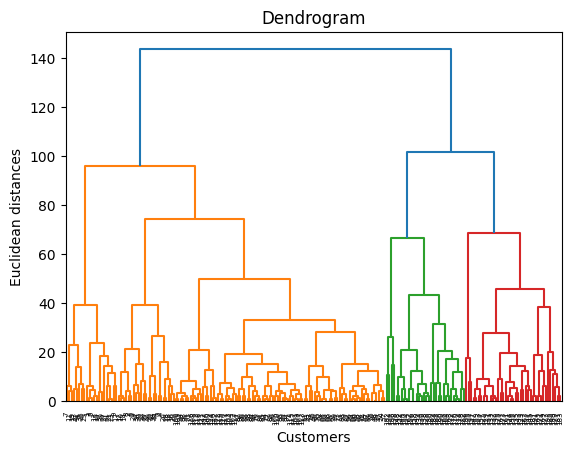

In [16]:
# Creación de dendogramas aplicando el método "complete linkage"

##creamos una variable que sera el output del dendograma
# Calculo de la distancia euclidea aplicando el mmétodo de Ward (la distancia o similitud entre dos clusters viene dada por la máxima distancia enrte ambos)
dendrogram = sch.dendrogram(sch.linkage(X, metric='euclidean', method = 'complete'))

##definimos la configuracion del gráfico
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

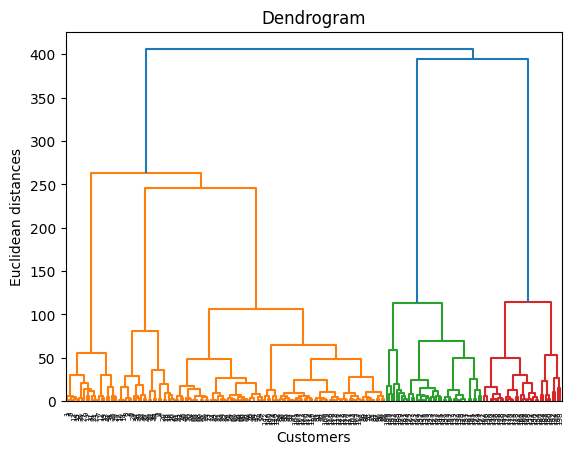

In [17]:
#  Creación de dendogramas aplicando el método "Ward"

##creamos una variable que sera el output del dendograma
# Calculo de la distancia euclidea aplicando el mmétodo de Ward (suma de cuadrados de las diferencias entre la distancia de los puntos)
dendrogram = sch.dendrogram(sch.linkage(X, metric='euclidean', method = 'ward'))

##definimos la configuracion del gráfico
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Para seleccionar el número de clusters óptimo para nuestro modelo emplearemos para ello una línea horizontal o "umbral de disimilitud", ya que el número óptimo de grupos se pueden encontrar donde tiene la mayor distancia, se puede mover verticalmente, sin tocar una de estas barras horizontales del dendograma.

En este caso, obtenemos que 5 clusters son el total de clusters optimos para nuesto análisis.

Por otra parte, los dendogramas de agrupamiento jerárquico a menudo se usan en combinación con un mapa de calor, que nos permite representar los valores individuales en la matriz o matriz de datos que contiene nuestros ejemplos de entrenamiento con un código de color. El orden de las filas en el mapa de calor refleja la agrupación de los ejemplos en el dendograma.

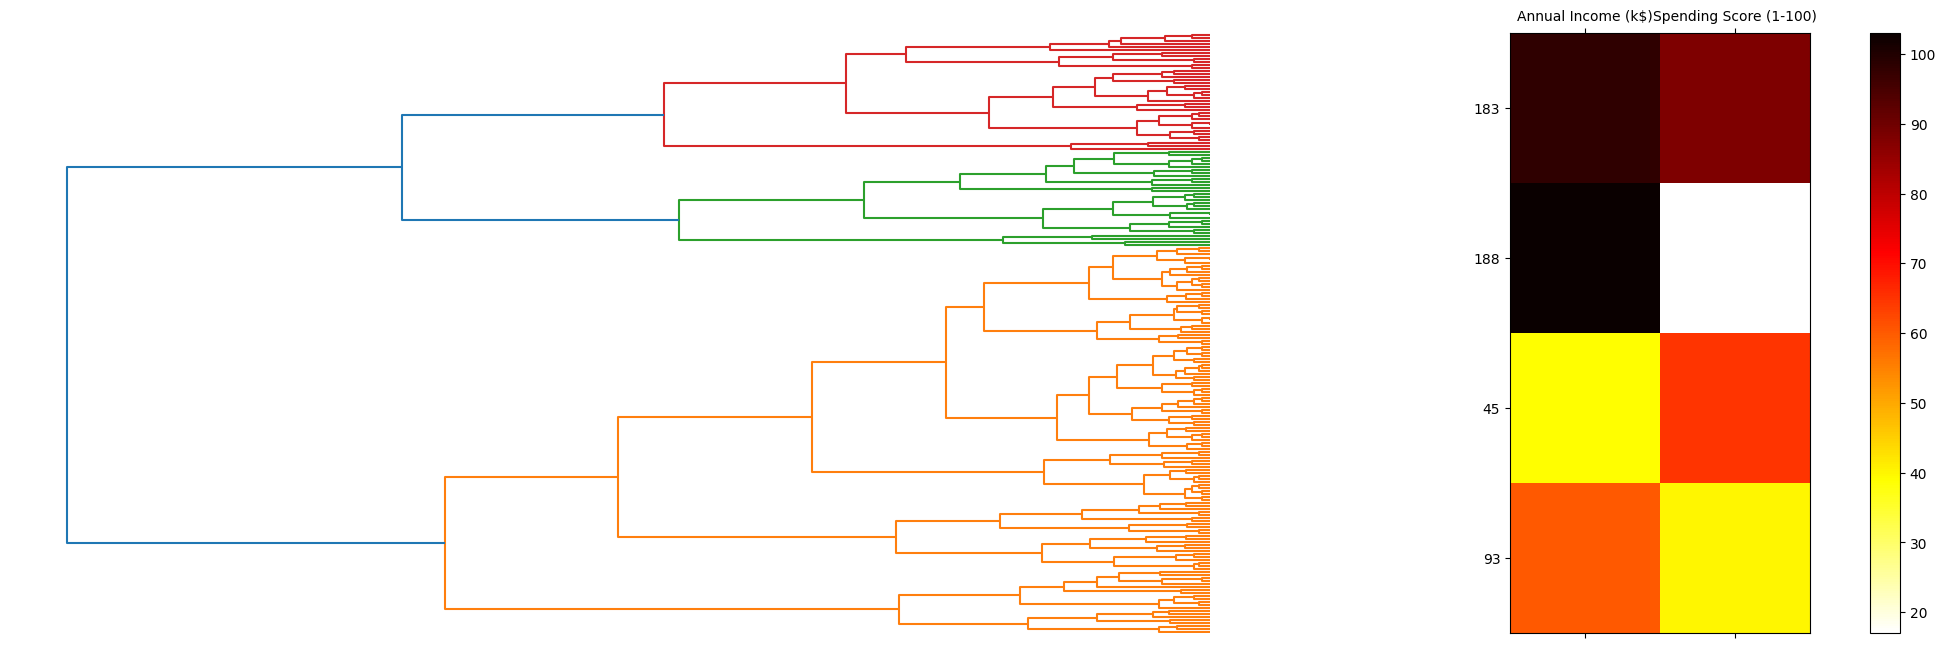

In [18]:
# Adjuntamos el dendograma a un mapa de color

## Crear el objeto de figura donde incrustremos las dos visualizaciones
fig = plt.figure(figsize= (60,10), facecolor='white')
axd = fig.add_axes([0.09,0.1,0.2,0.6])
# Cambiar el orden del dendograma
row_dendr = sch.dendrogram(sch.linkage(X, metric='euclidean', method = 'complete'), orientation='left')

df_rowclust = df_X.iloc[row_dendr['leaves'] [::-50]]

axm = fig.add_axes([0.23,0.1,0.2,0.6])
cax = axm.matshow(df_rowclust, interpolation = 'nearest', cmap = 'hot_r')


axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)

fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

##### 4.5. Construcción y entrenamiento del modelo de cluster jerárquico.

In [19]:
# Entrenamiento del modelo en el conjunto de datos

##Iniciamos la clase hc para almacenar las caracteríticas del modelo
#aplicamos la métrica de la distancia euclídea a través del método de Ward 
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
##y_hc hace referencia a la variable dependinte que queremos calcular
y_hc = hc.fit_predict(X)

#print de los resultados de la variable y_hc
print('Etiquetas de clase: %s\n' % y_hc)

Etiquetas de clase: [4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]



##### 4.6. Visualización de los resultados clasificados.

Vemos los diferentes clusters que se han formando al entrenar el modelo, los difentes clientes pertenecen a los diferentes clusters.

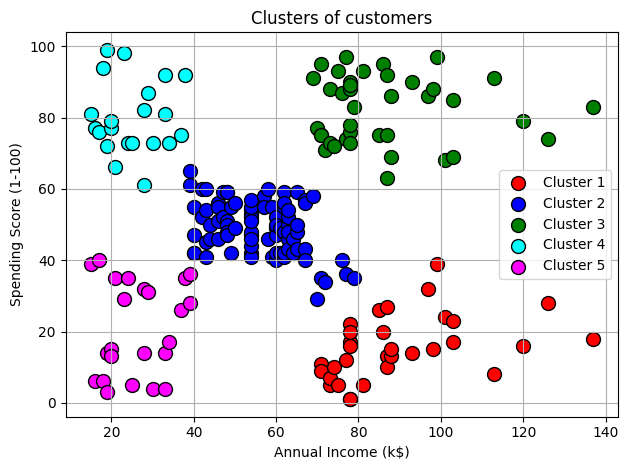

In [20]:
#Visualizamos los resultados de la generación de clusters en un gráfico

# Gráfico para cada uno de los clusters
#Grafico para el Cluster 1 (y_hc = 0)
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', edgecolor = 'black', label = 'Cluster 1')
#Grafico para el Cluster 2 (y_hc = 1)
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', edgecolor = 'black', label = 'Cluster 2')
#Grafico para el Cluster 3 (y_hc = 2)
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', edgecolor = 'black', label = 'Cluster 3')
#Grafico para el Cluster 4 (y_hc = 3)
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', edgecolor = 'black', label = 'Cluster 4')
#Grafico para el Cluster 5 (y_hc = 5)
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', edgecolor = 'black', label = 'Cluster 5')

#Configuracion del grafico
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

#### 5 Interpretación de los resultados

Una vez que visualizamos los resultados, podemos ver como se agrupan los clientes del centro comercial dentro de los 5 clusters contruídos tanto con el algoritmo de KMeans como con el algoritmo de aglomerados jerárquicos y, además, se podrán establecer diferentes tipos de estrategias de marketing y ventas.

Por ejemplo, en el Cluster 5 (marcado en rosa) vemos que se agrupan los clientes con mayor número de ingresos y que presentan un mayor ratio de gasto en las tiendas del centro comercial. Hacía este tipo de clientes podemos dirigirnos cuando el centro comercial lance nuevas ofertas en sus productos o tiendas, ya que de por sí están acostumbrados a comprar y suele ser un público fiel.

Por otra parte, es interesante fijarse en el Cluser 3 (marcado en verde), donde vemos que se encuentran clientes con un bajo nivel de ingresos y un bajo ratio de gasto en el centro comercial. Dependiendo de la ética o tipo de estrategias a seguir, teniendo en cuenta la situación de este colectivo de clientes, igual no interesa abrumar mucho a estas personas porque no tienen recursos suficientes y les estamos protegiendo, reforzando de esta forma la ética del centro comercial.

Por último, es interesante el Cluster 2 (marcado en azul), donde se agrupan clientes con altos ingresos pero un bajo ratio de gastos. En este caso, cabría implementar una estrategía enfocada en mejorar la relación con el cliente, informarle de nuevas ofertas y animar a este colectivo a que compren productos del centro comercial y fidelizarlos.